### **Chapter 03. PCA 클래스**

In [9]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)
    
    # 행
    rows = int(np.ceil(n / 10)) # 올림
    if rows == 1:
        cols = n # 열
    else:
        cols = 10      
    
    plt.figure(figsize=(cols * ratio, rows * ratio)) # (가로, 세로)

    for j in range(0, rows, 1):
        for k in range(0, cols, 1):
            index = j * 10 + k
            if index < n:
                plt.subplot(rows, cols, index + 1) # subplot은 1부터 시작하기 때문에 +1 해준다
                plt.imshow(arr[index, :, :], cmap="gray_r")
                plt.axis("off")

    plt.show()

In [4]:
import numpy as np

fruits = np.load("fruits.npy")
print(fruits.shape)

(1470, 100, 100)


In [5]:
fruits_2d = fruits.reshape(-1, 100 * 100)
print(fruits_2d.shape)

(1470, 10000)


In [6]:
# decomposition (n. 분해)
# SVD (= singular value decomposition)

from sklearn.decomposition import PCA

# 2-D 좌표평면 -> 2차원
# 10,000 차원

# The number of components
pca = PCA(n_components=50) # 10,000차원 --> 50차원

pca.fit(fruits_2d) # 2차원 배열로 바꿔서 넣어야 한다!

PCA(n_components=50)

In [7]:
pca.components_.shape

(50, 10000)

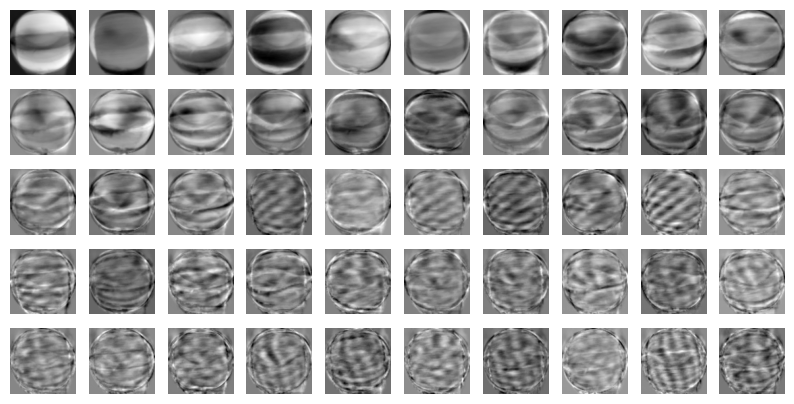

In [13]:
# 찾아낸 50개의 주성분을 시각화함
draw_fruits(pca.components_.reshape(-1, 100, 100))
# 첫 번째 그림이 1470개의 데이터의 분산을 가장 잘 표현(기하학적 특성)한 그림

In [15]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(1470, 50)


In [16]:
np.save("fruits_pca.npy", fruits_pca) # 기존 데이터에 비해 용량이 1/200만큼 줄었다

In [17]:
# inverse (a. 역의)
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(1470, 10000)


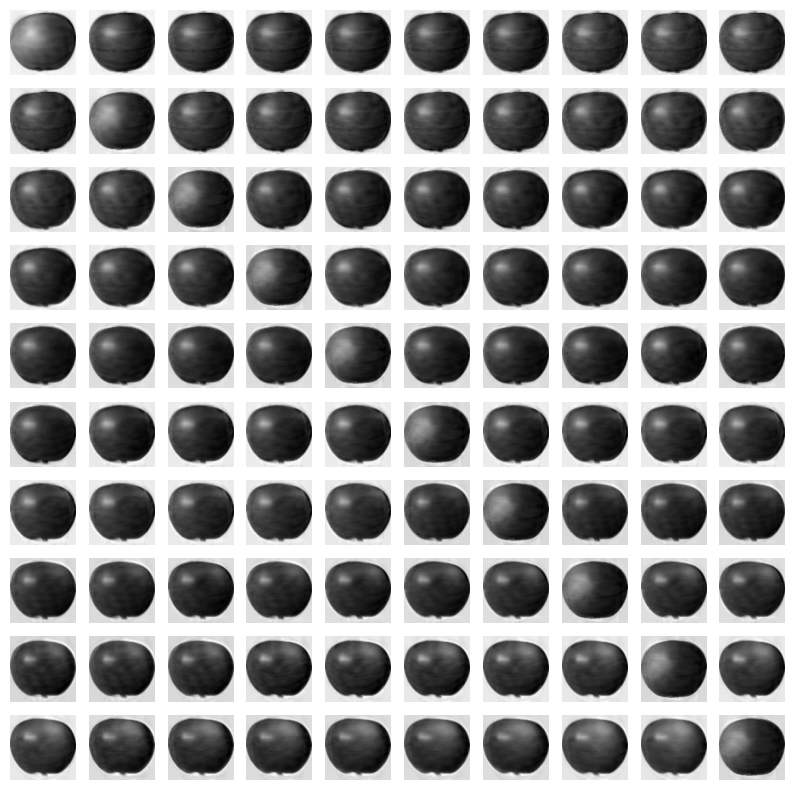

In [18]:
# 테두리 부분 정보 손실
draw_fruits(fruits_inverse.reshape(-1, 100, 100)[0:100]) # 사과 사진만

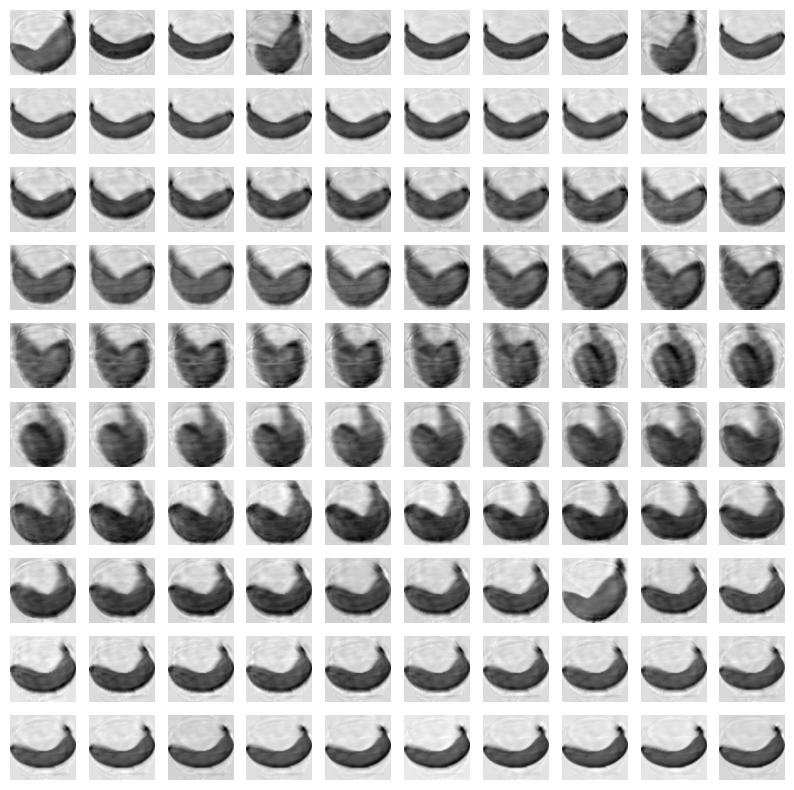

In [19]:
draw_fruits(fruits_inverse.reshape(-1, 100, 100)[490:590]) # 바나나 사진만

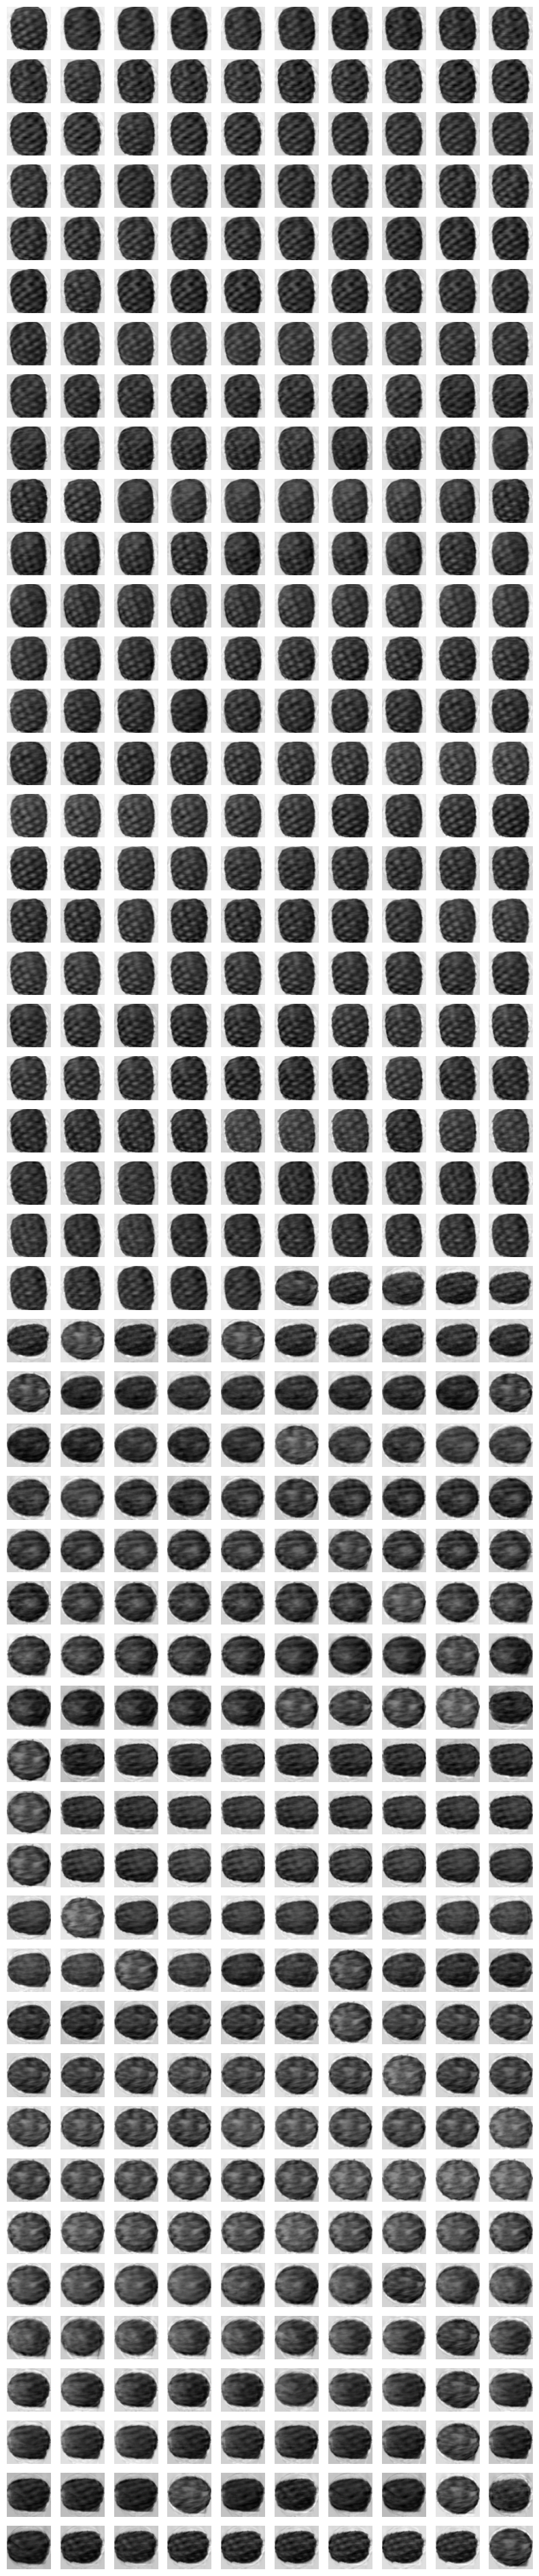

In [20]:
draw_fruits(fruits_inverse.reshape(-1, 100, 100)[980:1980]) # 파인애플 사진만

In [21]:
pca.explained_variance_ # 설명된 분산

array([26677872.49129315,  5516887.37605445,  2645600.49705114,
        2001516.855977  ,   950951.60353209,   844901.6292396 ,
         674080.42850411,   538422.42079537,   427804.58146557,
         415711.46691768,   340652.81710533,   327658.82671859,
         295364.17657089,   255776.14145225,   221785.11547467,
         191389.99428813,   177112.49517876,   167191.72030055,
         146102.5092522 ,   138134.34297708,   128014.01340847,
         120842.04773583,   107430.841336  ,   101169.89250249,
          97776.75527233,    93400.68599646,    90683.48032547,
          86611.27208044,    81425.75344694,    77354.62299123,
          77028.61222548,    71958.12893163,    67822.58516064,
          66189.17308896,    63928.16733822,    62074.23236153,
          57366.0169468 ,    56943.08730599,    53997.62279887,
          53320.27210452,    50795.40686571,    49801.08293922,
          48153.41763766,    46699.40401252,    45567.7885712 ,
          43405.08812673,    42240.95980

In [22]:
pca.explained_variance_ratio_

array([0.5586464 , 0.11552605, 0.05540004, 0.04191264, 0.01991335,
       0.01769261, 0.01411554, 0.0112748 , 0.00895842, 0.00870518,
       0.00713342, 0.00686132, 0.00618506, 0.00535607, 0.00464428,
       0.00400779, 0.00370881, 0.00350107, 0.00305945, 0.00289259,
       0.00268067, 0.00253049, 0.00224965, 0.00211854, 0.00204749,
       0.00195585, 0.00189895, 0.00181368, 0.00170509, 0.00161984,
       0.00161301, 0.00150683, 0.00142023, 0.00138603, 0.00133868,
       0.00129986, 0.00120127, 0.00119241, 0.00113073, 0.00111655,
       0.00106368, 0.00104286, 0.00100835, 0.00097791, 0.00095421,
       0.00090892, 0.00088454, 0.00087252, 0.00084667, 0.00082328])

In [23]:
np.sum(pca.explained_variance_ratio_) # 5.73% 정보 손실

0.9427036991935595

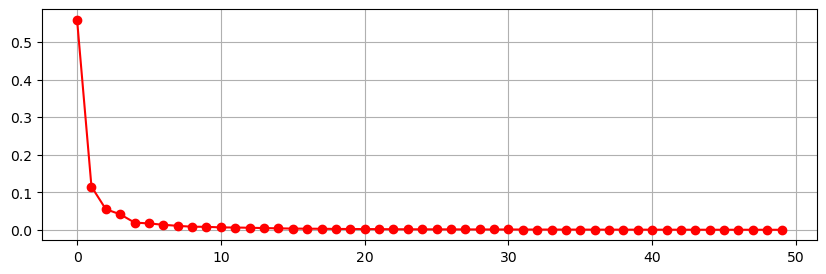

In [24]:
plt.figure(figsize=(10, 3))

plt.plot(pca.explained_variance_ratio_, marker='o', color="red")
plt.grid()

plt.show()

### **Chapter 04. 다른 알고리즘과 함께 사용하기**

In [25]:
# n_components=50 (정수) = 주성분 개수
# n_components=0.6 (실수) = 타켓으로 하고 있는 설명된 분산

pca = PCA(n_components=0.6)
pca.fit(fruits_2d)

PCA(n_components=0.6)

In [26]:
pca.n_components_.shape

()

In [27]:
fruits_pca = pca.transform(fruits_2d)

print(fruits_pca.shape)

(1470, 2)


In [29]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, init="random", random_state=42)
km.fit(fruits_pca)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(init='random', n_clusters=3, random_state=42)

In [30]:
np.unique(km.labels_, return_counts=True)

(array([0, 1, 2]), array([490, 727, 253], dtype=int64))

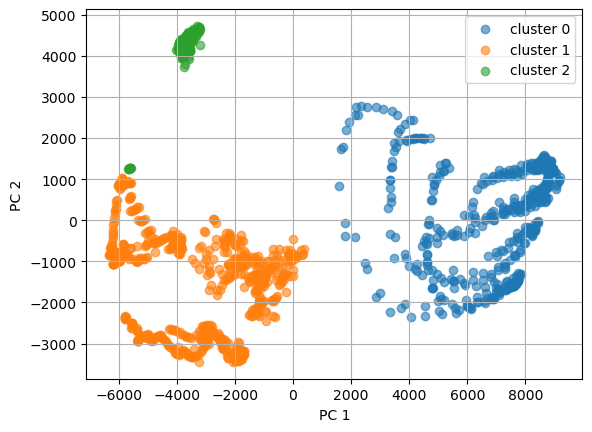

In [32]:
# 2차원으로 데이터 시각화하여 oulier 발견하고 처리 ㄱㄴ
plt.figure()

for label in range(0, 3, 1):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1], alpha=0.6)
    
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend(["cluster 0", "cluster 1", "cluster 2"])
plt.grid()

plt.show()